In [24]:
import pandas as pd
import numpy as np

import random
from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

import plotly.graph_objects as go

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import dash
import dash_core_components as dcc

import dash_html_components as html
from dash.dependencies import Input, Output,State



sns.set(style="darkgrid")


mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [25]:
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  

df_analyse.sort_values('date',ascending=True).head()

date  India  China  Japan  Pakistan  Nepal
0  2020-01-22      0    548      2         0      0
1  2020-01-23      0    643      2         0      0
2  2020-01-24      0    920      2         0      0
3  2020-01-25      0   1406      2         0      1
4  2020-01-26      0   2075      4         0      1

In [26]:
N0=1000000 #The maximum susceptible population
beta=0.4   
gamma=0.1  
I0=df_analyse.China[35]
S0=N0-I0
R0=0

In [27]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# The Simulative approach to calculate the SIR curves

In [28]:
SIR=np.array([S0,I0,R0])

propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})




for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

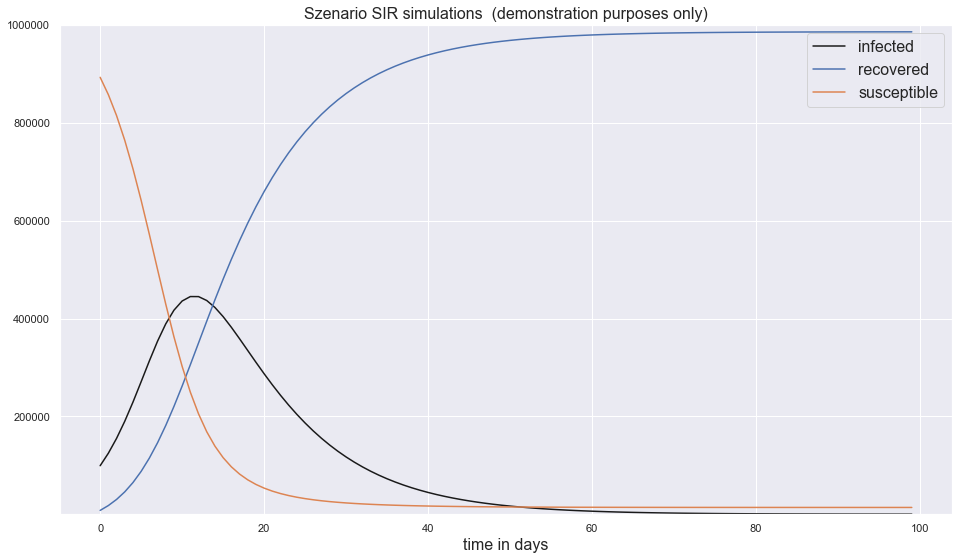

In [29]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')


ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [30]:
ydata = np.array(df_analyse.China[35:])
t=np.arange(len(ydata))
print(t)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198]


In [31]:
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [32]:
def SIR_model_t(SIR,t,beta,gamma):
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [33]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [34]:
popt=[0.4,0.1]
fit_odeint(t, *popt)


array([7.81660000e+04, 1.01629183e+05, 1.30234748e+05, 1.63963311e+05,
       2.02139289e+05, 2.43288486e+05, 2.85177618e+05, 3.25096085e+05,
       3.60331911e+05, 3.88682392e+05, 4.08812071e+05, 4.20352571e+05,
       4.23765813e+05, 4.20076508e+05, 4.10587895e+05, 3.96653543e+05,
       3.79529309e+05, 3.60297569e+05, 3.39843188e+05, 3.18860568e+05,
       2.97876077e+05, 2.77275786e+05, 2.57332905e+05, 2.38232254e+05,
       2.20090845e+05, 2.02974571e+05, 1.86911421e+05, 1.71901763e+05,
       1.57926246e+05, 1.44951819e+05, 1.32936276e+05, 1.21831659e+05,
       1.11586786e+05, 1.02149110e+05, 9.34660725e+04, 8.54860610e+04,
       7.81590851e+04, 7.14372254e+04, 6.52749204e+04, 5.96291292e+04,
       5.44594044e+04, 4.97278975e+04, 4.53993170e+04, 4.14408529e+04,
       3.78220779e+04, 3.45148341e+04, 3.14931110e+04, 2.87329188e+04,
       2.62121612e+04, 2.39105096e+04, 2.18092810e+04, 1.98913196e+04,
       1.81408849e+04, 1.65435445e+04, 1.50860736e+04, 1.37563604e+04,
      

In [35]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.00038731 0.00032867]  start infect: 78166
Optimal parameters: beta = 0.006364860770302173  and gamma =  0.004893373132325838


In [36]:
fitted=fit_odeint(t, *popt)

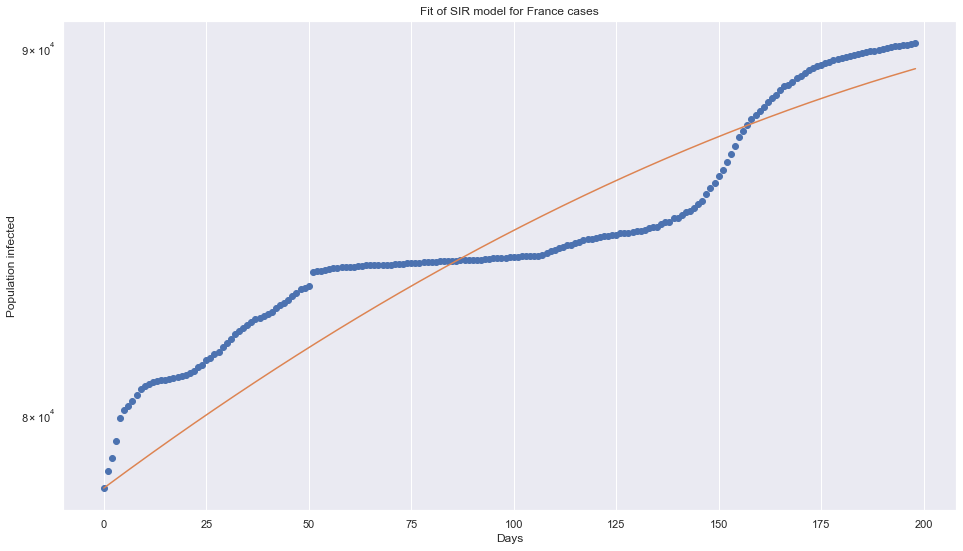

Optimal parameters: beta = 0.006364860770302173  and gamma =  0.004893373132325838
Basic Reproduction Number R0  1.3007102867867613
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [37]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for France cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# infection rate-Dynamic beta in SIR

In [38]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [39]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [40]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

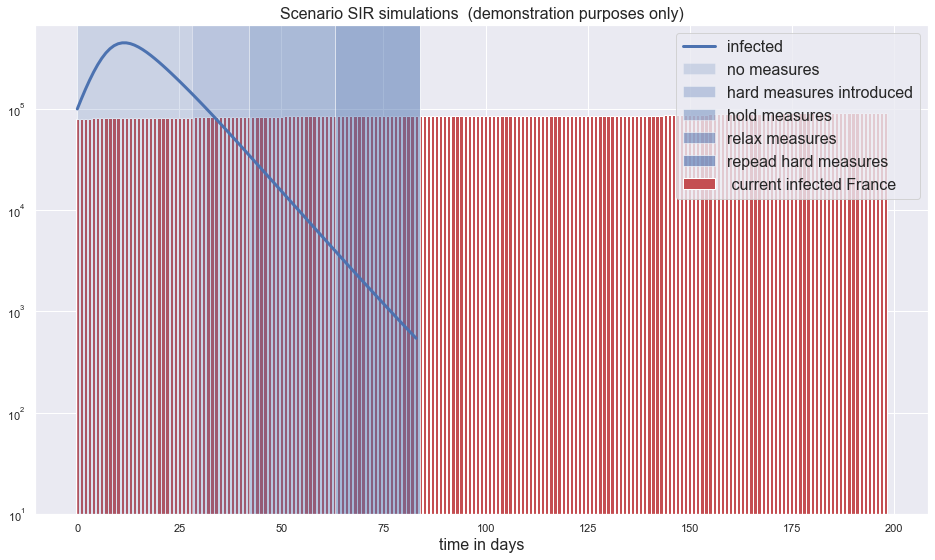

In [41]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected France',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [42]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [43]:
pd_raw = pd.read_csv(data_path)
country_list = pd_raw['Country/Region'].unique()
date=pd_raw.columns[4:]
df_analyse=pd.DataFrame({'Date':date})

for each in country_list:
    df_analyse[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0)).T
df_analyse.to_csv('../data/raw/COVID-19/csse_covid_19_data/SIR.csv',index=False)

df_analyse.sort_values('Date',ascending=True).head()

Date  Afghanistan  Albania  Algeria  Andorra  Angola  \
0  1/22/20            0        0        0        0       0   
1  1/23/20            0        0        0        0       0   
2  1/24/20            0        0        0        0       0   
3  1/25/20            0        0        0        0       0   
4  1/26/20            0        0        0        0       0   

   Antigua and Barbuda  Argentina  Armenia  Australia    ...     \
0                    0          0        0          0    ...      
1                    0          0        0          0    ...      
2                    0          0        0          0    ...      
3                    0          0        0          0    ...      
4                    0          0        0          4    ...      

   United Kingdom  Uruguay  Uzbekistan  Venezuela  Vietnam  \
0               0        0           0          0        0   
1               0        0           0          0        2   
2               0        0           0          0        2   
3               0        0           0          0        2   
4               0        0           0          0        2   

   West Bank and Gaza  Western Sahara  Yemen  Zambia  Zimbabwe  
0                   0               0      0       0         0  
1                   0               0      0       0         0  
2                   0               0      0       0         0  
3                   0               0      0       0         0  
4                   0               0      0       0         0  

[5 rows x 189 columns]

In [44]:
N0=1000000 
beta=0.4   
gamma=0.1  

df_data=df_analyse[35:]
t=np.arange(df_data.shape[0])
# condition I0+S0+R0=N0

R0=0
for country in df_data.columns[1:]:
    y_data=np.array(df_data[df_data[country]>0][country])
    t=np.arange(len(y_data))
    I0=y_data[0]
    S0=N0-I0
    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    popt, pcov = optimize.curve_fit(fit_odeint, t, y_data, maxfev=5000)
    perr = np.sqrt(np.diag(pcov))
    fitted=fit_odeint(t, *popt)
    fitted_pad = np.concatenate((np.zeros(df_data.shape[0]-len(fitted)) ,fitted))
    df_data[country + '_fitted'] = fitted_pad

df_data = df_data.reset_index(drop=True)
df_data.to_csv('../data/processed/SIR_fitted.csv')
    
    

C:\Users\aaris\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\aaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\aaris\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\aaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [45]:
color_list = []
for i in range(200):
    var = '#%02x%02x%02x'%(random.randint(0,255),random.randint(0,255),random.randint(0,255))
    color_list.append(var)

In [ ]:
fig = go.Figure()
app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Data Science Project SIR
    
    * This dashboard plots two curves for each country:
    
    The first curve represents the confirmed infected cases along the timeline.
    The second curve represents the simulated infected cases after applying the SIR model along the timeline. 
    
    '''),

    dcc.Markdown('''
    ## Multi-Select Country for visualization
    '''),
    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_data.columns[1:200]],
        value=['Germany','France'], # which are pre-selected
        multi=True),
    dcc.Dropdown(
        id='SIR',
        options=[ {'label': 'Susceptable','value':'susceptable'}, {'label': 'Infected','value':'infected'}, {'label': 'Recovered','value':'recovered'},],
        value='confirmed',
        multi=False),
    dcc.Graph(figure=fig, id='main_window_slope')])


@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    v = 0
    my_yaxis={'type':"log",'title':'Infected people'}
    traces = []
    for each in country_list:
        traces.append(dict(x=df_data['Date'],y=df_data[each],
                                mode='line', line = dict(color = color_list[v]), opacity=1.0,name=each))
        traces.append(dict(x=df_data['Date'],
                                y=df_data[each+'_fitted'],
                                mode='markers',line = dict(color=color_list[v]), opacity=1.0,name=each+'_simulated'))

        v = v+1
    return {
            'data': traces,
            'layout': dict (
                width=1280,height=720,
                xaxis={'title':'Timeline','tickangle':-45,'nticks':20,
                'tickfont':dict(size=14,color="#0c6887"),},yaxis=my_yaxis)}

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
